In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as scsp
import scipy.integrate as scint
import scipy.stats as scst
import sys
# sys.path.insert(0, '/users/milan/nudetect')
import nudetect

In [5]:
h119_noise_5 = nudetect.Noise("/Volumes/Samsung_1TB/detectorData/H119/20190624_H119_noise_5C/20190624_H119_noise_5C.fits",
                        detector="H119",
                        temp=5,
                        data_dir='/Volumes/Samsung_1TB/detectorData/H119/20190624_H119_noise_5C',
                        plot_dir='/Volumes/Samsung_1TB/detectorData/H119/figures')

In [6]:
h119_noise_5.load_raw_data()

In [7]:
%%time
h119_noise_5.gen_quick_noise(save_plot=False)

CPU times: user 43.2 s, sys: 1.76 s, total: 45 s
Wall time: 46.5 s


mean  mean error        fwhm  fwhm error
pixel row pixel col                                               
0         0         -81.818890   91.798195  834.023971  218.865993
          1         -40.375986   29.962833  541.594014   70.557162
          2         -20.357124   15.393533  423.820411   36.249000
          3         -15.956442    9.821194  354.809067   23.127144
          4         -12.013837    6.260581  317.923043   14.742543
...                        ...         ...         ...         ...
31        27          2.476605    0.150100  118.413458    0.353459
          28        -11.835213    0.270335  124.359950    0.636589
          29        -17.127981    0.423096  146.516683    0.996316
          30        -31.833571    0.780628  177.920190    1.838239
          31        -51.160489    1.505261  215.619716    3.544620

[1024 rows x 4 columns]

In [8]:
%%time
h119_noise_5.gen_full_noise(save_plot=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [04:02<00:00, 15.19s/it]

CPU times: user 3min 45s, sys: 9.26 s, total: 3min 55s
Wall time: 4min 3s


mean  mean error        fwhm   fwhm error
start cap pixel row pixel col                                                 
0         0         0         -117.310343  514.277537  794.203638  1223.576320
                    1          -70.198274  140.921823  503.328054   331.845624
                    2          -42.909448   68.728367  392.210205   161.842936
                    3           -4.352492   41.998823  360.079032    98.899671
                    4           -0.979827   35.135349  326.079137    82.737425
...                                   ...         ...         ...          ...
15        31        27          -0.742949    1.784467  126.633361     4.202100
                    28          -6.130187    3.207360  139.860017     7.552756
                    29          -9.988964    3.987632  163.000279     9.390156
                    30         -24.716264    5.885857  180.132897    13.860133
                    31         -35.161165   13.430455  236.277146    31.626305

[16384 rows x 4 columns]

In [6]:
import numpy.ma as ma

In [7]:
mx = ma.array([1,2,3], mask=[0,0,0])

In [15]:
mx.data

array([1, 2, 3])

In [17]:
h119_noise_5._mean_maps[:,16,14]

array([14.97353024,  1.10864824,  4.45263352, 27.18435779, 30.14307711,
       18.16516495, 16.79561125, 38.55978503, 38.77582765, 16.58009483,
       18.68070851, 31.34415723, 27.92363969,  5.35530357,  2.46939333,
       14.76519781])

In [38]:
noisemap = fits.open('data/capoffsets_H119_noise_5C_0V_20190624_nogain.fits')
zeromap = fits.open('/users/milan/crush2/nucorrect/nustaroffset_zeros.fits')

In [12]:
noisemap[1].data

FITS_rec([( 0,  0, [-117.31034  , -114.79251  , -126.92836  ,  -51.658054 ,  -73.80912  ,  -75.39706  ,  -99.58666  ,  -61.891228 ,   25.961878 ,  -73.42053  ,  -90.236305 ,  -72.64975  ,  -20.26115  ,  -79.59587  , -114.0155   , -103.28701  ]),
          ( 0,  1, [ -66.14016  ,  -65.497795 ,  -75.89641  ,  -22.175463 ,  -32.465958 ,  -42.559795 ,  -55.076828 ,  -22.895481 ,   33.141777 ,  -38.030476 ,  -49.86969  ,  -33.25028  ,    3.0077548,  -44.48303  ,  -61.843594 ,  -52.587696 ]),
          ( 0,  2, [ -57.156574 ,  -57.123543 ,  -57.850056 ,  -15.359429 ,  -25.325916 ,  -30.597431 ,  -48.05713  ,  -17.928698 ,   27.218536 ,  -30.489231 ,  -36.26694  ,  -25.774273 ,    3.0698316,  -34.99853  ,  -55.48977  ,  -42.57544  ]),
          ...,
          (31, 29, [ -27.79169  ,  -31.11233  ,  -44.684288 ,  -17.159575 ,  -22.237078 ,  -37.816044 ,  -34.45156  ,  -18.67079  ,  -17.75051  ,  -29.777134 ,  -25.63506  ,  -14.56746  ,  -18.072393 ,  -37.959232 ,  -45.891705 ,  -17.691635 ]),
 

In [46]:
zeromap[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   66 / width of table in bytes                        
NAXIS2  =                 1024 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'RAWX    '           / label for field   1                            
TFORM1  = '1B      '           / data format of field: BYTE                     
TTYPE2  = 'RAWY    '           / label for field   2                            
TFORM2  = '1B      '           / data format of field: BYTE                     
TTYPE3  = 'OFFSET  '        

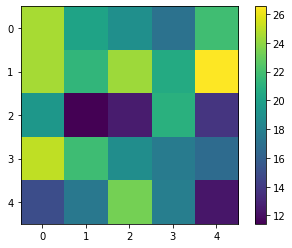

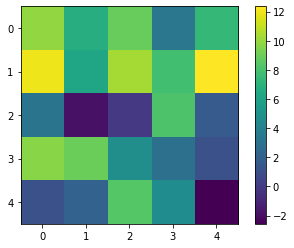

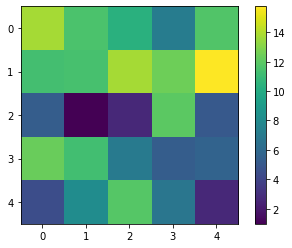

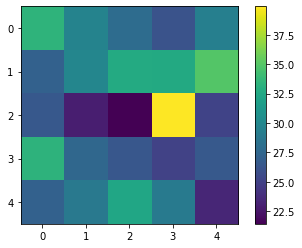

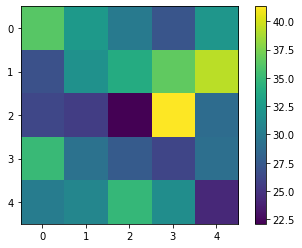

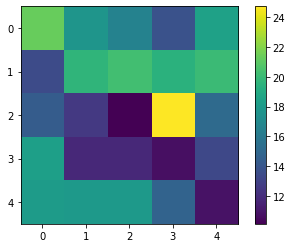

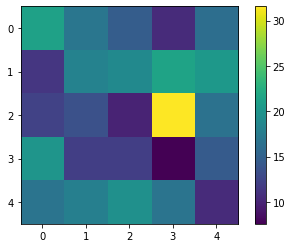

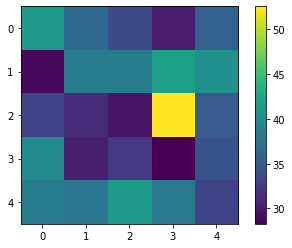

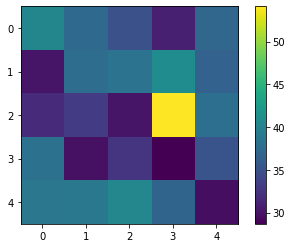

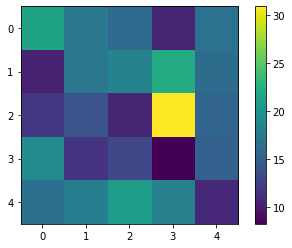

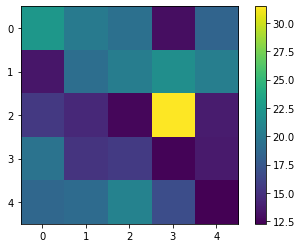

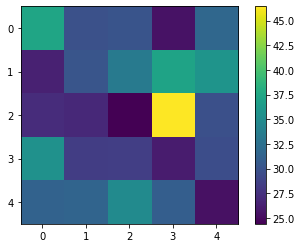

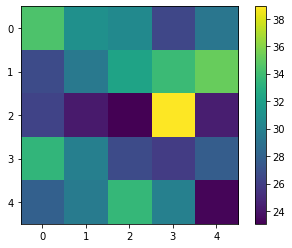

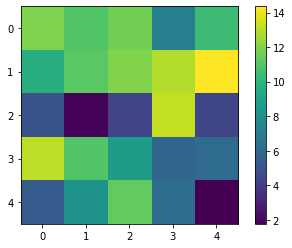

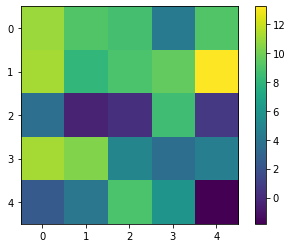

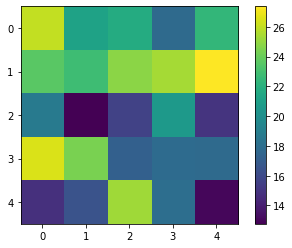

In [19]:
for c in range(16):
    plt.imshow(h119_noise_5._mean_maps[c,12:17,14:19])
    plt.colorbar()
    plt.show()

In [34]:
h119_noise_5._full_fit_data.loc[(8,14,17)]

mean          54.120878
mean error     0.043598
fwhm          37.150684
fwhm error     0.102665
Name: (8, 14, 17), dtype: float64

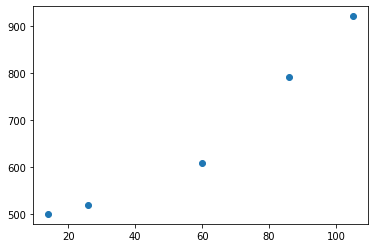

In [51]:
energies = np.array([14 , 26, 60, 86, 105])
fwhms = np.array([500, 520, 609, 791, 921])

plt.scatter(energies, fwhms)